Основной задачей текущего ноутбука является поиск аномалий в транзакциях.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json


In [2]:
data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


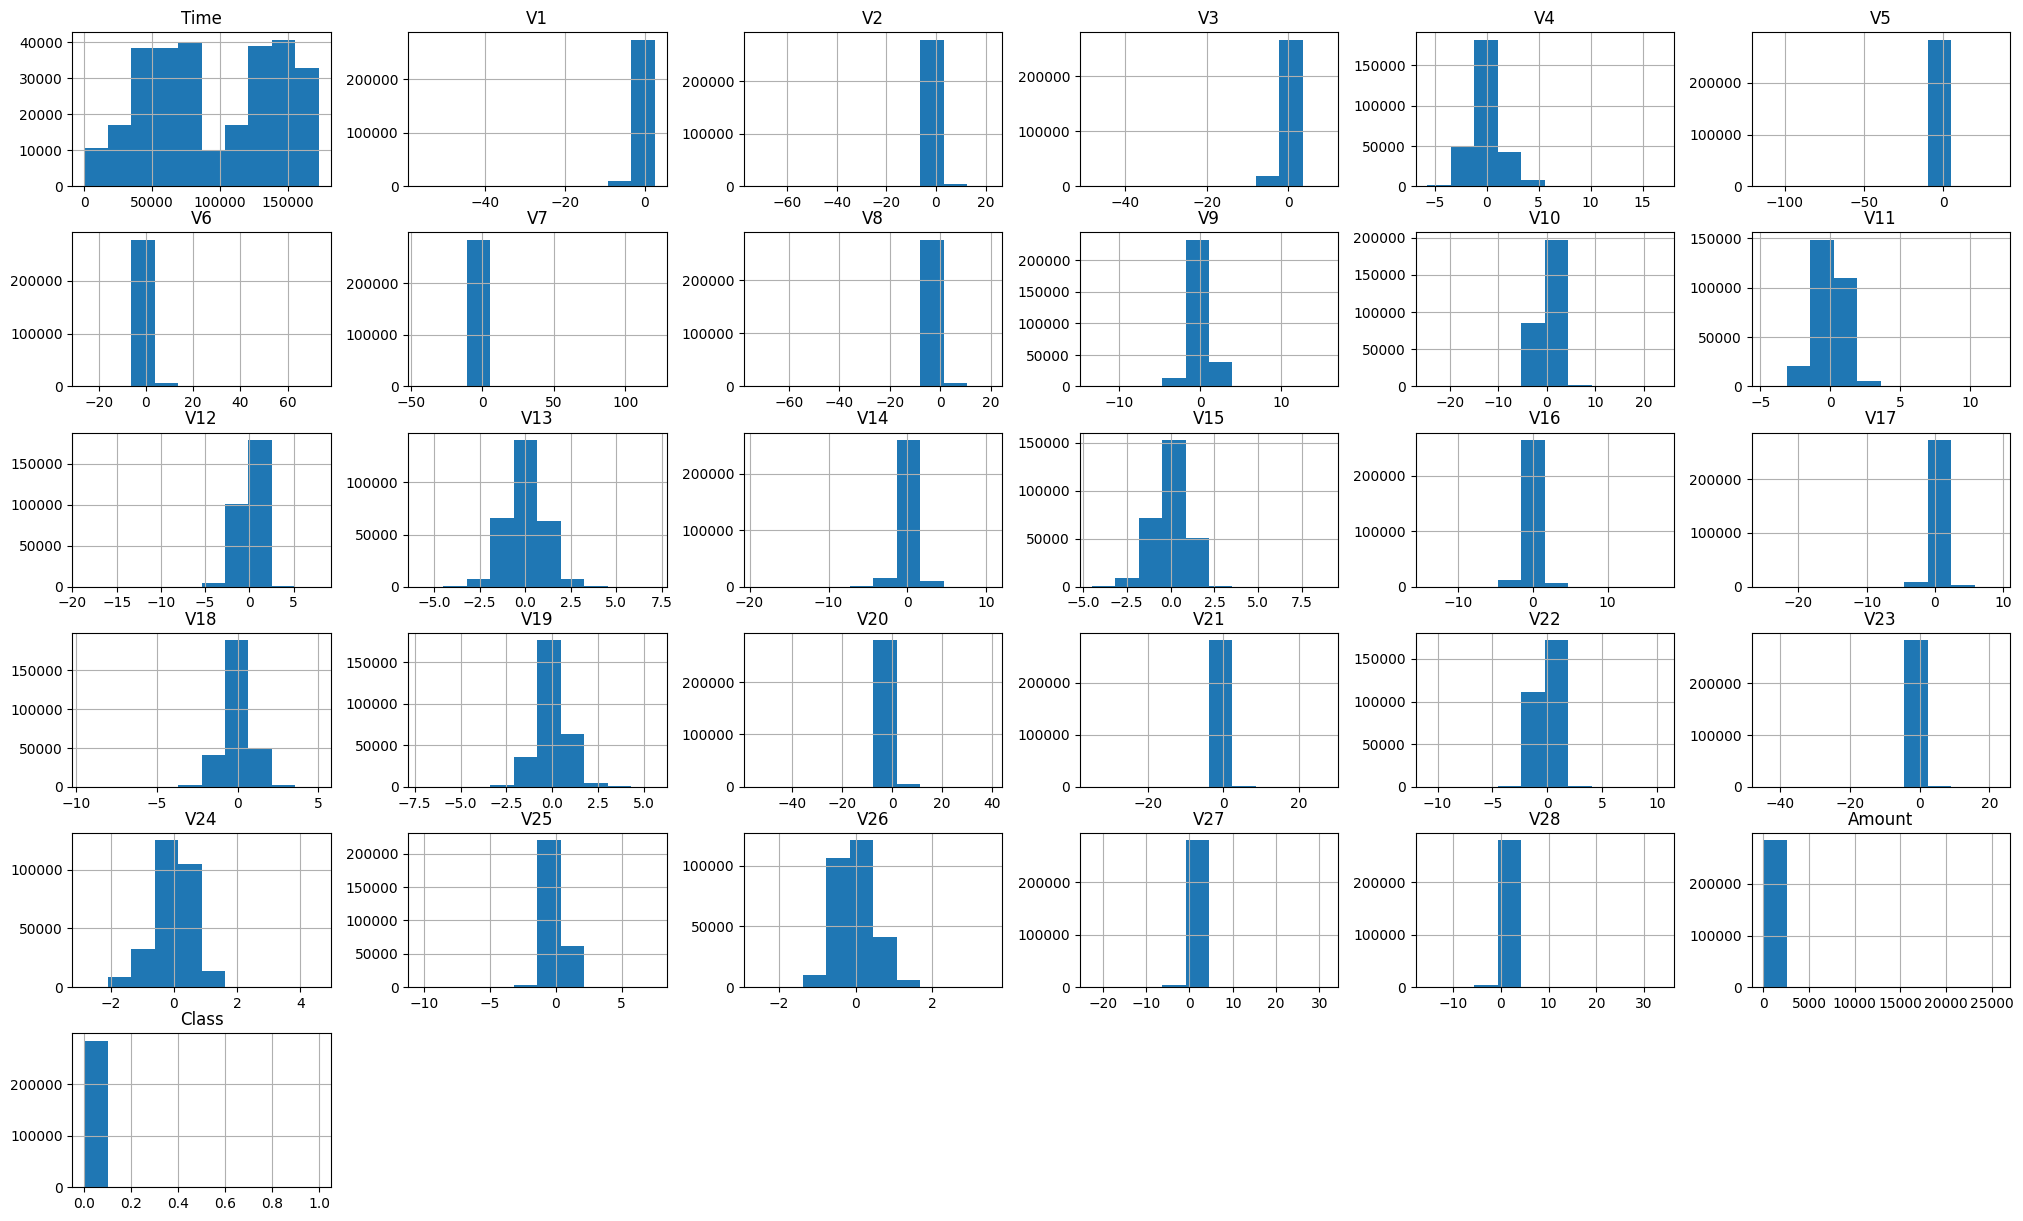

In [4]:
data.hist(figsize=(25, 15))

plt.show()

In [5]:
corr = data.corr()
corr[corr == 1] = np.nan
corr[(corr > 0.7).any()].count()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import recall_score

TSNE считается долго, так что я посчитал его один раз и гружу из пикла для ускорения

In [7]:
X = data.drop(['Class', 'Time'], axis=1)
scaled_x = MinMaxScaler().fit_transform(X)
# tsne = TSNE(n_components=2, random_state=10, n_jobs=-1)
# tsne_data = tsne.fit_transform(scaled_x)

In [8]:
import pickle

with open('hometask_11.pickle', 'rb') as f:
    tsne_data = pickle.load(f)

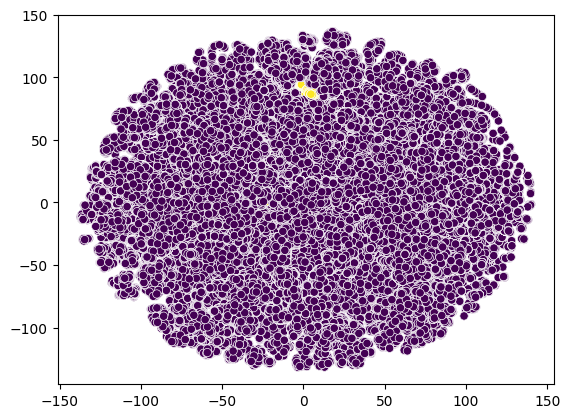

In [9]:
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], c=data['Class']);

In [10]:
X = data.drop(['Class', 'Time'], axis=1)
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
y = data['Class']
percentage = y[y==1].count() / y.count()

percentage

0.001727485630620034

Как видно, в данных около 0.1% выбросов

## Статистические методы

In [11]:
sigma_outliers = []
recalls = {}

def sigma_model(X, n: int = 3):
    up_bound = X.mean(axis=0) + i * X.std(axis=0)
    low_bound = X.mean(axis=0) - i * X.std(axis=0)
    return np.where((X < low_bound) | (X > up_bound), 1, 0).any(axis=1).astype('int8')

for i in range(3, 25): # возможность тестирования для различных кратных значений сигма
    predict = sigma_model(X, i)
    recalls[i] = recall_score(predict, y)
    sigma_outliers.append(predict)
    
# print(len(predict), len(y))
print(list(zip(predict, y)))
print(json.dumps(recalls, indent=3))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [12]:
predict = sigma_model(X, 22)

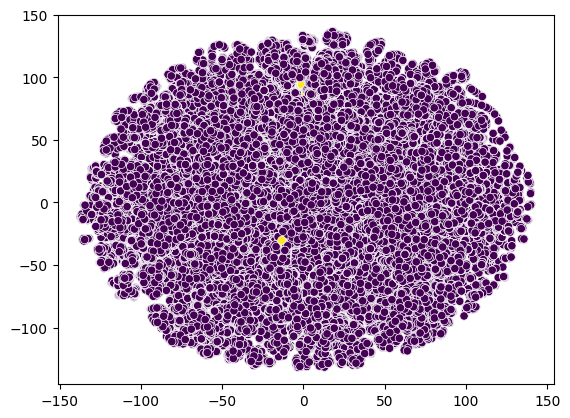

In [13]:
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], c=predict);

Как можно заметить, сигма находит не только нужные выбросы

In [15]:
sum_list = np.array(sigma_outliers).sum(axis=1)
mean_list = np.array(sigma_outliers).mean(axis=1)

# Сохраняем значения для отклонения с наименьшим процентом выбросов
sigma_outliers = np.array(sigma_outliers)[sum_list.argmin()]

# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке для {} сигм: {}'.format(sum_list.argmin() + 3, sum_list.min()))
print('Процент выбросов в выборке для {} сигм: {:.2%}'.format(mean_list.argmin() + 3, mean_list.min()))

Количество выбросов в выборке для 24 сигм: 196
Процент выбросов в выборке для 24 сигм: 0.07%


In [16]:
sigma=pd.DataFrame(columns=['upper_bound',	'lower_bound',	'anomalies_count',	'anomalies_percentage'])
threshold = 22
for col in X.columns:
    up_bound = X[col].mean() + threshold * X[col].std()
    low_bound = X[col].mean() - threshold * X[col].std()
    anomalies = pd.concat([X[col]>up_bound, X[col]<low_bound], axis=1).sum(axis=1)>=1
    sigma.loc[col] = [up_bound, low_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]

sigma

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V1,1.690362,0.226226,2.0,0.000702
V2,1.150581,0.383936,21.0,0.007373
V3,1.415453,0.259374,2.0,0.000702
V4,1.632744,-1.128884,0.0,0.000000
V5,0.970135,0.561297,10.0,0.003511
V6,0.557704,-0.031665,1.0,0.000351
V7,0.431159,0.099552,22.0,0.007725
V8,1.067242,0.503529,30.0,0.010533
V9,1.295391,-0.369831,0.0,0.000000
V10,1.004336,0.013108,2.0,0.000702


Как видно, полнота при значении сигма 10 составляет 21%

## Кластеризация

In [17]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
model = DBSCAN(eps=0.5, min_samples=10, n_jobs=-1).fit(X)
unique_labels = np.unique(model.labels_)
predict = model.labels_ < 0
recall_score(y, predict)

Теоретически, DBScan может выявить аномалии благодаря тому что они стоят одтельно от прочего пространства признаков. Но в данном случае, на моей машине не хватает ресурсов для обучения :(

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
cluster.fit_predict(scaled_x)
cluster.n_clusters_

: 

: 

## One Class SVM

In [11]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y)
one_class_svm = OneClassSVM(nu=0.05, gamma='auto') 
one_class_svm.fit(train_x, train_y)
svm_outliers = one_class_svm.predict(test_x)
# svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [28]:
predict = np.array([1 if label == -1 else 0 for label in svm_outliers])
recall_score(predict, test_y)

0.029577464788732393

Полнота 2.95%. Маловато.

## IsolationForest

In [21]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, max_features=1.0, bootstrap=True)
isolation_forest.fit(train_x, train_y)

isolation_outliers = isolation_forest.predict(test_x)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [22]:
recall_score(isolation_outliers, test_y)

0.030277063696086834

Не сильно лучше, чем SVM

## Offtop

Было бы неплохо совместить статистические методы с алоритмами принятия решений, на основе выборки из датасета